In [ ]:

#is a 3*3 = 3*1 -> 1*3...

#this exp is on finding it out...

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



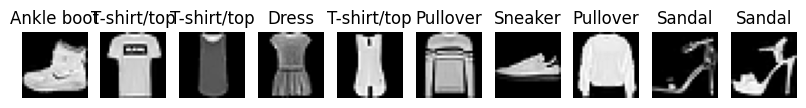

In [4]:
def plot_sample_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

plot_sample_images(train_images, train_labels, class_names, num_images=10)


In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [7]:
input_shape = (28, 28, 1)

inp_layer = tf.keras.Input(shape = input_shape)

x = layers.Conv2D(filters= 32, kernel_size = (3,3), activation = 'relu')(inp_layer)
x = layers.MaxPooling2D(pool_size=(2,2))(x)

x = layers.Conv2D(filters= 32, kernel_size = (3,3), activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)

x = layers.Flatten()(x)


out_layer = layers.Dense(10, activation = 'softmax')(x)

model = tf.keras.Model(inputs = inp_layer, outputs=out_layer)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0     

In [9]:
model.compile(optimizer='Adam', loss= 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [10]:
history = model.fit(train_images, train_labels,epochs=10)

#took 1min 20.3secs

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4998 - accuracy: 0.8220
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3459 - accuracy: 0.8768
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3092 - accuracy: 0.8886
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2851 - accuracy: 0.8975
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2641 - accuracy: 0.9050
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2492 - accuracy: 0.9100
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2359 - accuracy: 0.9144
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2265 - accuracy: 0.9185
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2187 - accuracy: 0.9196
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.

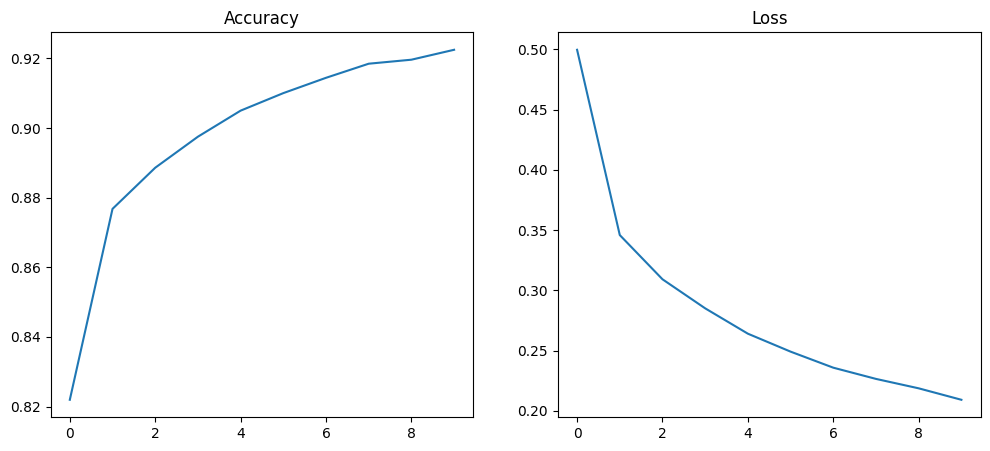

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Accuracy')
plt.plot(history.history['accuracy'])
plt.subplot(1, 2, 2)
plt.title('Loss')
plt.plot(history.history['loss'])

In [12]:
Y_pred = model.predict(test_images)
Y_pred_labels = [np.argmax(i) for i in Y_pred]

313/313 [==============================] - 1s 2ms/step


In [13]:
print(Y_pred_labels[:50])

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7, 4, 7, 2, 1, 2, 2]


0.9008
0.9018598446644366


<Axes: >

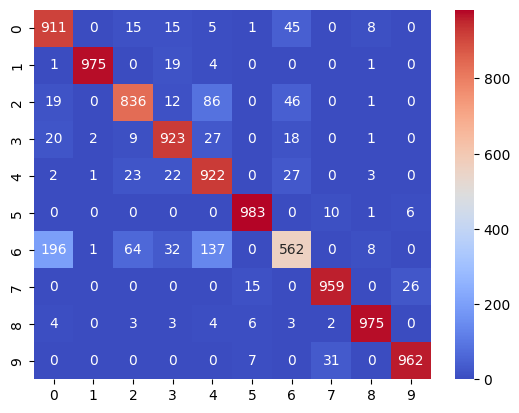

In [14]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix

print(accuracy_score(test_labels, Y_pred_labels))
print(precision_score(test_labels, Y_pred_labels, average='weighted'))
cf = confusion_matrix(test_labels, Y_pred_labels)
sns.heatmap(cf, cmap = 'coolwarm', annot = True, fmt='d')

In [15]:
report = classification_report(test_labels, Y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.88      0.84      0.86      1000
           3       0.90      0.92      0.91      1000
           4       0.78      0.92      0.84      1000
           5       0.97      0.98      0.98      1000
           6       0.80      0.56      0.66      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [7]:
input_shape = (28, 28, 1)

inp_layer = tf.keras.Input(shape = input_shape)

x = layers.Conv2D(filters= 32, kernel_size = (1,3), activation = 'relu')(inp_layer)
x = layers.Conv2D(filters= 32, kernel_size = (3,1), activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)

x = layers.Conv2D(filters= 32, kernel_size = (1,3), activation = 'relu')(x)
x = layers.Conv2D(filters= 32, kernel_size = (3,1), activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)

x = layers.Flatten()(x)


out_layer = layers.Dense(10, activation = 'softmax')(x)

model_2 = tf.keras.Model(inputs = inp_layer, outputs=out_layer)

In [8]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 26, 32)        128       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        3104      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 11, 32)        3104      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        3104      
                                                             

In [9]:
model_2.compile(optimizer='Adam', loss= 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [10]:
history_2 = model_2.fit(train_images, train_labels,epochs=10)

#took 2min 38.9secs

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.4973 - accuracy: 0.8192
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3386 - accuracy: 0.8770
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2983 - accuracy: 0.8935
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2722 - accuracy: 0.9010
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2555 - accuracy: 0.9078
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2397 - accuracy: 0.9126
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2283 - accuracy: 0.9171
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2193 - accuracy: 0.9189
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2132 - accuracy: 0.9222
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step -

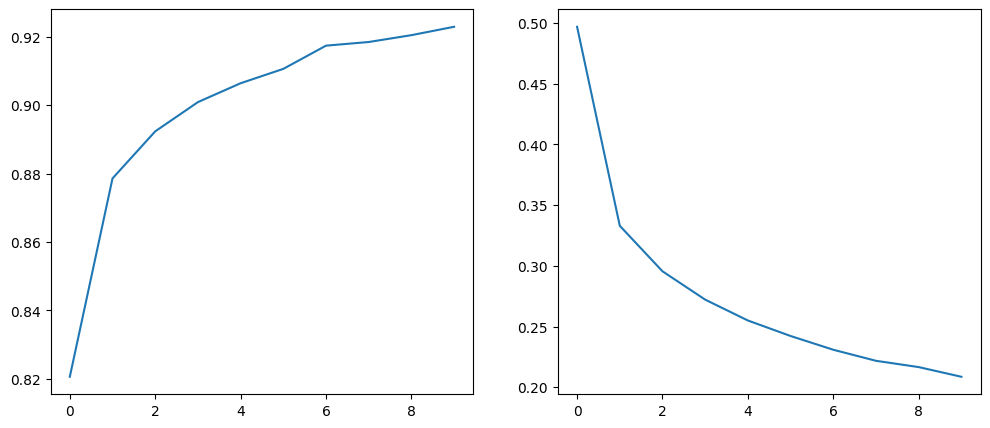

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'])
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'])

In [22]:
Y_pred = model_2.predict(test_images)
Y_pred_labels = [np.argmax(i) for i in Y_pred]

313/313 [==============================] - 1s 3ms/step


In [23]:
print(Y_pred_labels[:50])

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5, 1, 6, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 0, 7, 4, 7, 2, 1, 2, 6]


In [24]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix

print(accuracy_score(test_labels, Y_pred_labels))
print(precision_score(test_labels, Y_pred_labels, average='weighted'))

0.9068
0.9082486909960551


In [25]:
report = classification_report(test_labels, Y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.86      0.86      1000
           3       0.94      0.88      0.91      1000
           4       0.87      0.83      0.85      1000
           5       0.99      0.98      0.98      1000
           6       0.71      0.74      0.72      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [7]:
input_shape = (28, 28, 1)

inp_layer = tf.keras.Input(shape = input_shape)

x = layers.Conv2D(filters= 32, kernel_size = (6,7), activation = 'relu')(inp_layer)
x = layers.MaxPooling2D(pool_size=(2,2))(x)



x = layers.Flatten()(x)


out_layer = layers.Dense(10, activation = 'softmax')(x)

model_3 = tf.keras.Model(inputs = inp_layer, outputs=out_layer)

In [8]:
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 23, 22, 32)        1376      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 10)                38730     
                                                                 
Total params: 40,106
Trainable params: 40,106
Non-trainable params: 0
_________________________________________________________

In [9]:
model_3.compile(optimizer='Adam', loss= 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [10]:
history_3 = model_3.fit(train_images, train_labels,epochs=10)

#1min 6.1secs

Epoch 1/10
1875/1875 [==============================] - 10s 2ms/step - loss: 0.4684 - accuracy: 0.8362
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3313 - accuracy: 0.8828
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2966 - accuracy: 0.8941
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2711 - accuracy: 0.9026
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2524 - accuracy: 0.9095
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2360 - accuracy: 0.9148
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2253 - accuracy: 0.9174
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2125 - accuracy: 0.9227
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2011 - accuracy: 0.9270
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.

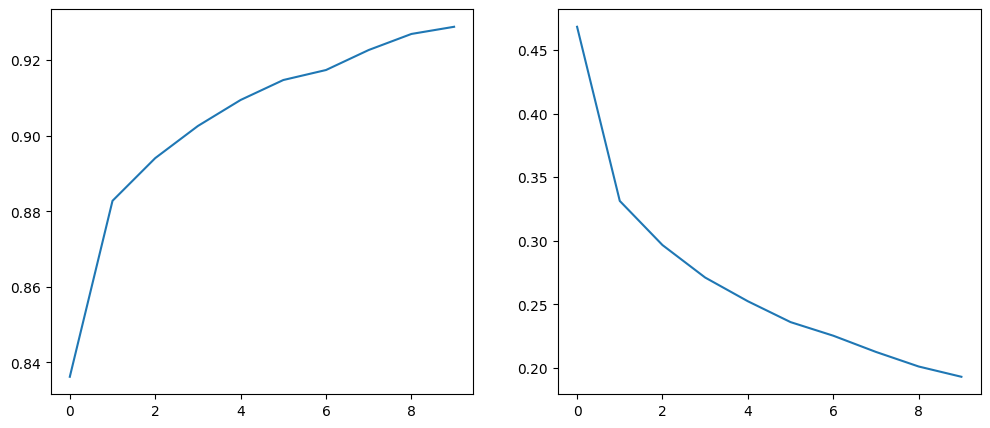

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history_3.history['accuracy'])
plt.subplot(1, 2, 2)
plt.plot(history_3.history['loss'])

In [12]:
Y_pred = model_3.predict(test_images)
Y_pred_labels = [np.argmax(i) for i in Y_pred]

313/313 [==============================] - 1s 2ms/step


In [13]:
print(Y_pred_labels[:50])

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 5, 7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7, 6, 7, 2, 1, 2, 6]


0.9043
0.9046842060491769


<Axes: >

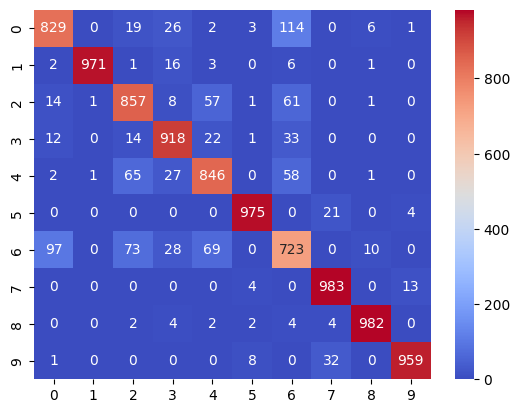

In [14]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix

print(accuracy_score(test_labels, Y_pred_labels))
print(precision_score(test_labels, Y_pred_labels, average='weighted'))
cf = confusion_matrix(test_labels, Y_pred_labels)
sns.heatmap(cf, cmap = 'coolwarm', annot = True, fmt='d')

In [15]:
report = classification_report(test_labels, Y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.83      0.86      0.84      1000
           3       0.89      0.92      0.91      1000
           4       0.85      0.85      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.72      0.72      0.72      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [7]:
input_shape = (28, 28, 1)

inp_layer = tf.keras.Input(shape = input_shape)

x = layers.Conv2D(filters= 32, kernel_size = (6,1), activation = 'relu')(inp_layer)
x = layers.Conv2D(filters= 32, kernel_size = (1,7), activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2))(x)



x = layers.Flatten()(x)


out_layer = layers.Dense(10, activation = 'softmax')(x)

model_4 = tf.keras.Model(inputs = inp_layer, outputs=out_layer)

In [8]:
model_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 23, 28, 32)        224       
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 22, 32)        7200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 10)                38730     
                                                             

In [9]:
model_4.compile(optimizer='Adam', loss= 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [10]:
history_4 = model_4.fit(train_images, train_labels,epochs=10)

#2min 11.1secs

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4467 - accuracy: 0.8414
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3098 - accuracy: 0.8892
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2683 - accuracy: 0.9023
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2401 - accuracy: 0.9125
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2170 - accuracy: 0.9202
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2020 - accuracy: 0.9258
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1849 - accuracy: 0.9311
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1712 - accuracy: 0.9367
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1573 - accuracy: 0.9433
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - los

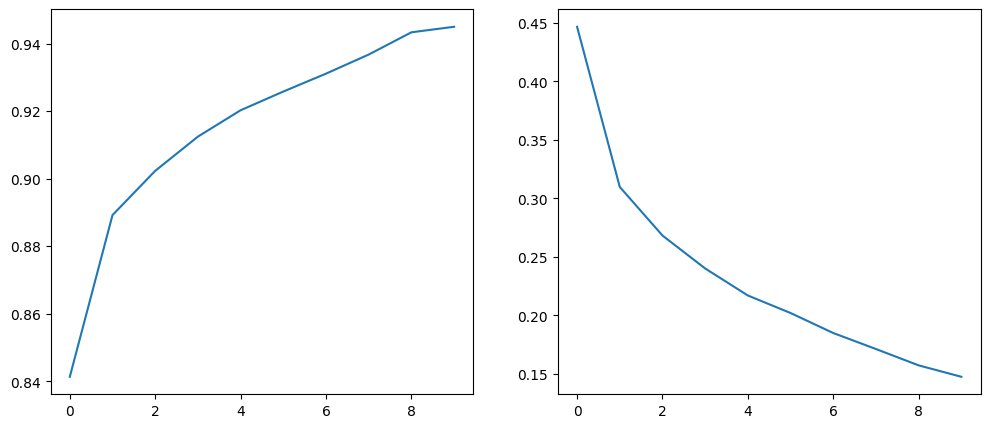

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history_4.history['accuracy'])
plt.subplot(1, 2, 2)
plt.plot(history_4.history['loss'])

In [12]:
Y_pred = model_4.predict(test_images)
Y_pred_labels = [np.argmax(i) for i in Y_pred]

313/313 [==============================] - 1s 3ms/step


In [13]:
print(Y_pred_labels[:50])

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 2, 8, 0, 2, 5, 7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 1, 3, 8, 0, 7, 5, 7, 9, 6, 1, 0, 7, 6, 7, 2, 1, 2, 6]


0.9088
0.9096668969248539


<Axes: >

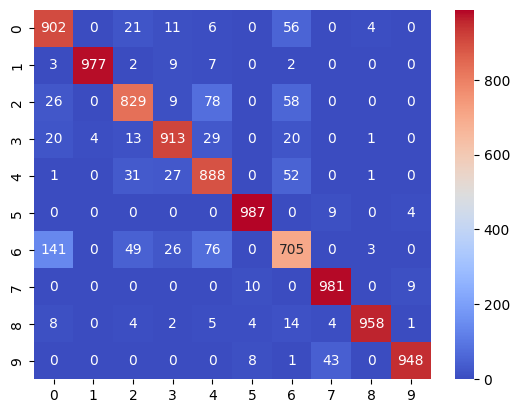

In [14]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix

print(accuracy_score(test_labels, Y_pred_labels))
print(precision_score(test_labels, Y_pred_labels, average='weighted'))
cf = confusion_matrix(test_labels, Y_pred_labels)
sns.heatmap(cf, cmap = 'coolwarm', annot = True, fmt='d')

In [15]:
report = classification_report(test_labels, Y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.87      0.83      0.85      1000
           3       0.92      0.91      0.91      1000
           4       0.82      0.89      0.85      1000
           5       0.98      0.99      0.98      1000
           6       0.78      0.70      0.74      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.96      0.97      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

